In [4]:
import import_ipynb
import common.SGC as SGC
import itertools
import numpy as np
import matplotlib.pyplot as plt
import common.functions as fun

importing Jupyter notebook from /mnt/DANE/Dokumenty/Informatyka/Projekty/optimal-egc/Notebooks/common/SGC.ipynb
importing Jupyter notebook from /mnt/DANE/Dokumenty/Informatyka/Projekty/optimal-egc/Notebooks/common/functions.ipynb


In [5]:
def minMaxBlockCount():
    codes=fun.generateAllMinCodes()
    minBlocksCount={}
    maxBlocksCount={}
    for i in codes:
        for nucOrd,posOrd in codes[i]:
            codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
            for j in range(i,65):
                complement=fun.complementCode(codons[j:])
                blocksCount=len(complement)
                if j in minBlocksCount:
                    minBlocksCount[j]=min(minBlocksCount[j],blocksCount)
                    maxBlocksCount[j]=max(maxBlocksCount[j],blocksCount)
                else:
                    minBlocksCount[j]=blocksCount
                    maxBlocksCount[j]=blocksCount
    return (minBlocksCount, maxBlocksCount)

In [6]:
minBlock, maxBlock=minMaxBlockCount()

minPlotData=[]
maxPlotData=[]
for i in range(28,65):
    minPlotData.append(minBlock[i])
    maxPlotData.append(maxBlock[i])

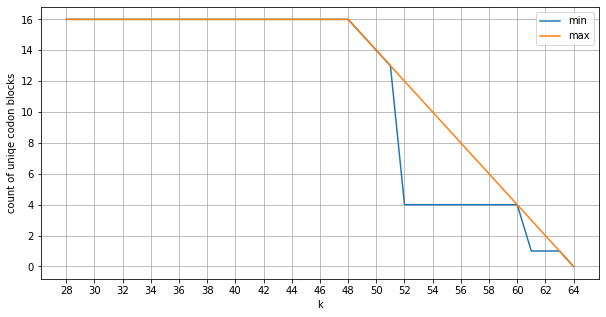

In [7]:
plt.xlabel("k")
plt.ylabel("count of uniqe codon blocks")
plt.xticks(range(28,65,2))
plt.gcf().set_size_inches(10,5)
plt.grid(True)
plt.plot(range(28,65),minPlotData, label="min")
plt.plot(range(28,65),maxPlotData, label="max")
plt.legend()
plt.savefig("../Obrazy/countsOfUniqueBlocks.pdf",dpi=1000)

In [8]:
def optimalBalance():
    codes=fun.generateAllMinCodes()
    results={}
    for i in codes:
        for nucOrd,posOrd in codes[i]:
            codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
            for j in range(i,65):
                complement=fun.complementCode(codons[j:])
                sizesOfBlocks=[]
                newcodons=[]
                newaa=[]
                for newAA, codonSet in complement.items():
                    sizesOfBlocks.append(len(codonSet))
                    for codon in codonSet:
                        newaa.append(newAA)
                        newcodons.append(codon)
                condOld=fun.avarangeConductance(codons[:j], aa[:j])
                condNew=fun.avarangeConductance(newcodons, newaa)
                if (j,len(complement)) in results:
                    if abs(1-results[(j,len(complement))][0])>abs(1-condNew/condOld):
                        results[(j,len(complement))]=(condNew/condOld, condNew, condOld, sizesOfBlocks, nucOrd, posOrd)
                else:
                    results[(j,len(complement))]=(condNew/condOld, condNew, condOld, sizesOfBlocks, nucOrd, posOrd)
    return results

In [9]:
D=optimalBalance()

In [10]:
L=list(D.items())
L.sort()
L

[((28, 16),
  (0.8829113924050636,
   0.8611111111111114,
   0.9753086419753086,
   [3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
   ('T', 'G', 'A', 'C'),
   (3, 2, 1))),
 ((29, 16),
  (0.894886363636364,
   0.8680555555555558,
   0.9700176366843033,
   [3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
   ('G', 'T', 'A', 'C'),
   (3, 2, 1))),
 ((30, 16),
  (0.9053375912408761,
   0.8750000000000002,
   0.9664902998236332,
   [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
   ('T', 'G', 'A', 'C'),
   (3, 2, 1))),
 ((31, 16),
  (0.920925414364641,
   0.8819444444444446,
   0.9576719576719577,
   [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
   ('C', 'G', 'A', 'T'),
   (2, 3, 1))),
 ((32, 16),
  (0.9298892988929893,
   0.8888888888888892,
   0.9559082892416225,
   [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
   ('G', 'C', 'A', 'T'),
   (2, 3, 1))),
 ((33, 16),
  (0.9423701298701301,
   0.8958333333333336,
   0.9506172839506173,
   [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [11]:
print(r"\begin{tabular}{|l|l|l|l|l|}")
print(r"k & \(\Psi\) & Avg. cond. new & Avg. cond. old & \(|\cal C|\) \\")
print(r"\hline")
for k,w in L:
    print("{}&{:.4f}&{:.4f}&{:.4f}&{}\\\\".format(k[0],w[0],w[1],w[2],k[1]))
    print("\hline")
print(r"\end{tabular}")

\begin{tabular}{|l|l|l|l|l|}
k & \(\Psi\) & Avg. cond. new & Avg. cond. old & \(|\cal C|\) \\
\hline
28&0.8829&0.8611&0.9753&16\\
\hline
29&0.8949&0.8681&0.9700&16\\
\hline
30&0.9053&0.8750&0.9665&16\\
\hline
31&0.9209&0.8819&0.9577&16\\
\hline
32&0.9299&0.8889&0.9559&16\\
\hline
33&0.9424&0.8958&0.9506&16\\
\hline
34&0.9550&0.9028&0.9453&16\\
\hline
35&0.9678&0.9097&0.9400&16\\
\hline
36&0.9807&0.9167&0.9347&16\\
\hline
37&0.9937&0.9236&0.9295&16\\
\hline
38&1.0012&0.9306&0.9295&16\\
\hline
39&1.0043&0.9375&0.9335&16\\
\hline
40&1.0169&0.9444&0.9287&16\\
\hline
41&1.0302&0.9514&0.9235&16\\
\hline
42&1.0458&0.9583&0.9164&16\\
\hline
43&1.0595&0.9653&0.9111&16\\
\hline
44&1.0733&0.9722&0.9058&16\\
\hline
45&1.0863&0.9792&0.9014&16\\
\hline
46&1.1004&0.9861&0.8961&16\\
\hline
47&1.1148&0.9931&0.8908&16\\
\hline
48&1.1293&1.0000&0.8855&16\\
\hline
49&1.1358&1.0000&0.8804&15\\
\hline
50&1.1358&1.0000&0.8804&14\\
\hline
51&1.1408&1.0000&0.8765&13\\
\hline
52&0.8963&0.7778&0.8677&4\\
\hline


In [12]:
def optimalBalanceCondNew():
    codes=fun.generateAllMinCodes()
    results={}
    for i in codes:
        for nucOrd,posOrd in codes[i]:
            codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
            for j in range(i,65):
                complement=fun.complementCode(codons[j:])
                newcodons=[]
                newaa=[]
                for newAA, codonSet in complement.items():
                    for codon in codonSet:
                        newaa.append(newAA)
                        newcodons.append(codon)
                condOld=fun.avarangeConductance(codons[:j], aa[:j])
                condNew=fun.avarangeConductance(newcodons, newaa)
                if j in results:
                    if abs(1-results[j][0])>abs(1-condNew/condOld):
                        results[j]=(condNew/condOld, condNew)
                else:
                    results[j]=(condNew/condOld, condNew)
    return results

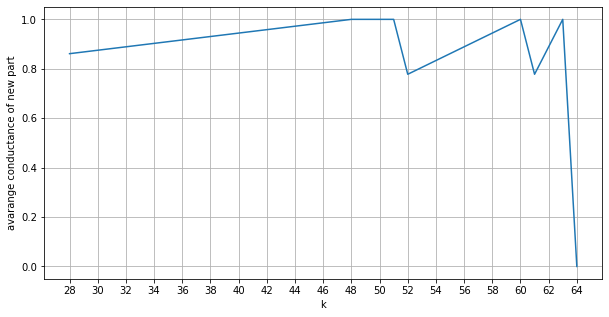

In [13]:
L=list(optimalBalanceCondNew().items())
L.sort()
plt.xlabel("k")
plt.ylabel("avarange conductance of new part")
plt.xticks(range(28,65,2))
plt.gcf().set_size_inches(10,5)
plt.plot(range(28,65),np.array([elem[1] for elem in L])[:,1])
plt.grid(True)

plt.savefig("../Obrazy/avgCondOfOptimalBalanceBlocks.pdf",dpi=1000)
plt.show()

### Block count

In [14]:
def blockCount():
    codes=fun.generateAllMinCodes()
    blocksCount={}
    for i in codes:
        for nucOrd,posOrd in codes[i]:
            codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
            for j in range(i,65):
                complement=fun.complementCode(codons[j:])
                if j in blocksCount:
                    blocksCount[j].add(len(complement))
                else:
                    blocksCount[j]={len(complement)}
    return blocksCount

In [15]:
blockCount()

{61: {1, 3},
 62: {1, 2},
 63: {1},
 64: {0},
 53: {4, 11},
 54: {4, 10},
 55: {4, 9},
 56: {4, 8},
 57: {4, 7},
 58: {4, 6},
 59: {4, 5},
 60: {4},
 39: {16},
 40: {16},
 41: {16},
 42: {16},
 43: {16},
 44: {16},
 45: {16},
 46: {16},
 47: {16},
 48: {16},
 49: {15},
 50: {14},
 51: {13},
 52: {4, 12},
 37: {16},
 38: {16},
 31: {16},
 32: {16},
 33: {16},
 34: {16},
 35: {16},
 36: {16},
 28: {16},
 29: {16},
 30: {16}}

### Print block spliting

In [16]:
def analizeCodunctanceBalance(nucOrd,posOrd,splitPoint):
    codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
    complement=fun.complementCode(codons[splitPoint:])
    newcodons=[]
    newaa=[]
    for newAA, codonSet in complement.items():
        for codon in codonSet:
            newaa.append(newAA)
            newcodons.append(codon)
    condOld=fun.avarangeConductance(codons[:splitPoint], aa[:splitPoint])
    condNew=fun.avarangeConductance(newcodons, newaa)

    print("Conductance of old aminoacids:",condOld)
    print("Conductance of new aminoacids:",condNew)
    print("Reminder old-new: ",condOld-condNew)
    print("New blocks:")
    print(complement)
    print("New aminoacids:",len(complement))

In [14]:
analizeCodunctanceBalance(('G', 'A', 'T', 'C'),(3, 2, 1),52)

Conductance of old aminoacids: 0.871252204585538
Conductance of new aminoacids: 1.0
Reminder old-new:  -0.12874779541446202
New blocks:
{'GA': {'GAC'}, 'AA': {'AAC'}, 'TA': {'TAC'}, 'CA': {'CAC'}, 'GT': {'GTC'}, 'AT': {'ATC'}, 'TT': {'TTC'}, 'CT': {'CTC'}, 'GC': {'GCC'}, 'AC': {'ACC'}, 'TC': {'TCC'}, 'CC': {'CCC'}}
New aminoacids: 12


In [15]:
analizeCodunctanceBalance(('T', 'A', 'G', 'C'), (3, 1, 2),52)

Conductance of old aminoacids: 0.8677248677248677
Conductance of new aminoacids: 0.7777777777777778
Reminder old-new:  0.08994708994708989
New blocks:
{'TC': {'TCC', 'TCG', 'TCA'}, 'AC': {'ACC', 'ACG', 'ACA'}, 'GC': {'GCG', 'GCA', 'GCC'}, 'CC': {'CCG', 'CCC', 'CCA'}}
New aminoacids: 4


In [16]:
analizeCodunctanceBalance(('C', 'G', 'T', 'A'), (3, 1, 2),61)

Conductance of old aminoacids: 0.8289241622574958
Conductance of new aminoacids: 1.0
Reminder old-new:  -0.17107583774250423
New blocks:
{'GA': {'GAA'}, 'TA': {'TAA'}, 'AA': {'AAA'}}
New aminoacids: 3


In [38]:
analizeCodunctanceBalance(('A', 'T', 'C', 'G'), (1, 3, 2),55)

Conductance of old aminoacids: 0.8589065255731922
Conductance of new aminoacids: 0.861111111111111
Reminder old-new:  -0.0022045855379188017
New blocks:
{'GG': {'GGT', 'GGG', 'GGC'}, 'GA': {'GAC', 'GAG'}, 'GT': {'GTG', 'GTC'}, 'GC': {'GCG', 'GCC'}}
New aminoacids: 4


In [18]:
analizeCodunctanceBalance(('A', 'C', 'T', 'G'), (1, 3, 2),55)

Conductance of old aminoacids: 0.8589065255731922
Conductance of new aminoacids: 0.861111111111111
Reminder old-new:  -0.0022045855379188017
New blocks:
{'GG': {'GGG', 'GGC', 'GGT'}, 'GA': {'GAT', 'GAG'}, 'GC': {'GCG', 'GCT'}, 'GT': {'GTT', 'GTG'}}
New aminoacids: 4


###  Puryns and pirymidyns

In [17]:
def ppBlocks():
    codes=fun.generateAllMinCodes()
    results={}
    for i in codes:
        for nucOrd,posOrd in codes[i]:
            codons,aa=fun.generateCodonsAndAA(nucOrd, posOrd)
            for j in range(i,65):
                complement=fun.complementCode(codons[j:])
                newcodons=[]
                newaa=[]
                for newAA, codonSet in complement.items():
                    if len(codonSet)!=2:
                        break
                    if len(codonSet)==2:
                        L=list(codonSet)
                        if (L[0][-1]=='G' or L[0][-1]=='A') and (L[1][-1]=='C' or L[1][-1]=='T') or \
                            (L[0][-1]=='C' or L[0][-1]=='T') and (L[1][-1]=='G' or L[1][-1]=='A'):
                            break
                    for codon in codonSet:
                        newaa.append(newAA)
                        newcodons.append(codon)
                    
                else:
                    condOld=fun.avarangeConductance(codons[:j], aa[:j])
                    condNew=fun.avarangeConductance(newcodons, newaa)
                    if (j,len(complement)) in results:
                        if abs(1-results[(j,len(complement))][0])>abs(1-condNew/condOld):
                            results[(j,len(complement))]=(condNew/condOld,nucOrd, posOrd)
                    else:
                        results[(j,len(complement))]=(condNew/condOld, nucOrd, posOrd)
    return results

In [18]:
D=ppBlocks()
L=list(D.items())
L.sort()
L

[((56, 4), (1.0456431535269708, ('G', 'A', 'T', 'C'), (3, 1, 2))),
 ((62, 1), (1.081545064377682, ('T', 'C', 'A', 'G'), (2, 1, 3))),
 ((64, 0), (0.0, ('T', 'A', 'G', 'C'), (1, 2, 3)))]

In [20]:
analizeCodunctanceBalance(('T', 'C', 'A', 'G'), (2, 1, 3),62)

Conductance of old aminoacids: 0.8218694885361554
Conductance of new aminoacids: 0.8888888888888888
Reminder old-new:  -0.06701940035273346
New blocks:
{'GG': {'GGA', 'GGG'}}
New aminoacids: 1


In [55]:
analizeCodunctanceBalance(('A', 'G', 'T', 'C'), (3, 1, 2),56)

Conductance of old aminoacids: 0.8500881834215169
Conductance of new aminoacids: 0.8888888888888888
Reminder old-new:  -0.03880070546737191
New blocks:
{'AC': {'ACC', 'ACT'}, 'GC': {'GCC', 'GCT'}, 'TC': {'TCT', 'TCC'}, 'CC': {'CCT', 'CCC'}}
New aminoacids: 4


In [16]:
analizeCodunctanceBalance(('G', 'C', 'T', 'A'), (3, 1, 2),56)

Conductance of old aminoacids: 0.8553791887125222
Conductance of new aminoacids: 0.8888888888888888
Reminder old-new:  -0.033509700176366675
New blocks:
{'GA': {'GAT', 'GAA'}, 'CA': {'CAA', 'CAT'}, 'TA': {'TAA', 'TAT'}, 'AA': {'AAT', 'AAA'}}
New aminoacids: 4


In [17]:
analizeCodunctanceBalance(('G', 'T', 'C', 'A'),(3, 2, 1),38)

Conductance of old aminoacids: 0.9294532627865961
Conductance of new aminoacids: 0.9305555555555557
Reminder old-new:  -0.0011022927689595674
New blocks:
{'CT': {'CTA', 'CTC'}, 'AT': {'ATC', 'ATA'}, 'GC': {'GCA', 'GCC'}, 'TC': {'TCA', 'TCC'}, 'CC': {'CCA', 'CCC'}, 'AC': {'ACA', 'ACC'}, 'GA': {'GAC', 'GAA'}, 'TA': {'TAA', 'TAC'}, 'CA': {'CAA', 'CAC'}, 'AA': {'AAC', 'AAA'}, 'GG': {'GGA'}, 'TG': {'TGA'}, 'CG': {'CGA'}, 'AG': {'AGA'}, 'GT': {'GTA'}, 'TT': {'TTA'}}
New aminoacids: 16


In [18]:
analizeCodunctanceBalance(('G', 'T', 'A', 'C'),   (3, 2, 1),28)

Conductance of old aminoacids: 0.9753086419753086
Conductance of new aminoacids: 0.8611111111111114
Reminder old-new:  0.11419753086419726
New blocks:
{'GC': {'GCA', 'GCC', 'GCT'}, 'TC': {'TCT', 'TCA', 'TCC'}, 'AC': {'ACA', 'ACC', 'ACT'}, 'CC': {'CCA', 'CCT', 'CCC'}, 'GG': {'GGC', 'GGA'}, 'TG': {'TGA', 'TGC'}, 'AG': {'AGA', 'AGC'}, 'CG': {'CGC', 'CGA'}, 'GT': {'GTC', 'GTA'}, 'TT': {'TTA', 'TTC'}, 'AT': {'ATC', 'ATA'}, 'CT': {'CTA', 'CTC'}, 'GA': {'GAC', 'GAA'}, 'TA': {'TAA', 'TAC'}, 'AA': {'AAC', 'AAA'}, 'CA': {'CAA', 'CAC'}}
New aminoacids: 16
